## Exercício 1 (2 pontos)

a) Explique o que são GAMs e quais suas principais vantagens em relação à regressão linear. 

Descreva cenários onde a GAM funcionaria bem e a regressão linear teria um desempenho pior, justificando o motivo para a diferença de desempenho.




***Resposta:*** GAMs são um modelo modelo aditivo linear, mas que permite o uso de funções não lineares `$f_j(X_j)$`em cada uma das variáveis.

Sua principal vantagem é permitir a modelagem de relações não lineares entre preditores e resposta, ao contrário da regressão linear, que só aceita relações lineares. Para gerar estas relação não-lineares, podemos ajustar curvas suavizadas arbitrárias. 

Em cenários onde a dependência entre a resposta e preditores é não-linear, como no caso de consumo de combustível e potência do motor, ou entre peso e altura de uma pessoa, a GAM provavelmente funcionará melhor. 


b) Explique com suas palavras o que são árvores de decisão e como elas são construídas.

Além disso, explique como a profundidade e número de nós de uma árvore influenciam no viés e variância do modelo.


***Resposta:*** Árvores de decisão é um algoritmo de aprendizado que se baseia na segmentação dos dados em regiões (nós internos e folhas) e que utiliza regras sobre os valores dos preditores para determinar os caminhos para a tomada de decisões.

As árvores são construídas de modo iterativo. No começo, todos os dados estão em um mesmo nó, a raíz. Em seguida, para todos os atributos disponível, analisa-se qual regra possibilita o maior aumento de qualidade dos nós após a separação dos dados. Em um problema de classificação, por exemplo, a qualidade de um nó pode ser medida pelas métricas Gini Index ou Entropia. O processo é repetido para cada uma das folhas geradas, até que alguma condição de parada seja atingida.

Bons exemplos para condição de parada é controlar a profundidade e/ou o número máximo de nós da árvore. Considerando um caso extremo onde os dados são separados até que cada observação esteja em um nó, teremos o overfitting que causará uma alta variância e desempenho ruim nos dados de testes. O contrário disso é uma árvore com poucos nós. Neste caso teríamos baixa variância e alto viés. Para escolher o número de nós ideal, pode-se utilizar validação cruzada com o conjunto de validação.

A profundidade influencia a árvore de modo similar ao número de nós, pois quanto mais profunda a árvore, mais nós ela possui.

c) Descreva o que são florestas aleatórias e algoritmos de boosting com árvores. Em seguida, compare ambos os algoritmos nos seguintes quesitos:

i) Modo de construção das árvores

ii) Principais parâmetros e como eles alteram a construção das árvores


***Resposta:*** Florestas aleatórias são um método de aprendizado composto pela combinação do resultado de diferentes arvores de decisão. Cada árvore da floresta é construída com amostras de bootstrap dos dados de treinamento, e toda vez que uma nova divisão é considerada, um número aleatório $m$ de variáveis é selecionado. Essa aleatoriedade é importante para reduzir a variância final, pois diferentes árvores irão priorizar diferentes preditores. 

Em um problema de classificação, a classe de uma observação de teste será escolhida pela "contagem de votos" do resultado de cada árvore (analise de qual nó folha a observação ficou). Já em um problema de regressão, normalmente, é tirada a média dos valores do nó folha que a observação ficou em cada árvore.

Alguns dos principais parâmetros de construção de uma random forest são: 
- o número de total de árvores que serão treinadas
- o critário de avaliação
- quantidade máxima de preditores para considerar em cada divisão.

O algoritmo de boosting também utiliza múltiplas árvores para realizar treinamento e predição, entretanto, cada árvore é treinada em um versão modificada dos dados originais. O boosting utiliza "aprendizes fracos", normalmente, árvores com profundidade máxima baixa, como 1 ou 2. São construídos modelos em sequência, onde cada novo modelo é treinado utilizando os resíduos das predições do modelo anterior. Desse modo, com um número grande de árvores, o resíduo é incrementalmente diminuído.

Alguns dos principais parâmetros de construção do boosting são:
- o número de árvores: se for muito pequeno, os modelos podem não conseguir ajustar os dados. Se for muito alto, pode ocorrer um ajuste excessivo sobre os dados de treino. 
- o parâmetros de penalização lambda: indica a contribuição de cada novo modelo para a predição. Para lambdas menores, o ocorre de modo mais suave com o aumento do número de árvores, mas requer mais árvores para fazer um ajuste adequado do modelo
- o número de folhas ou profundidade máxima: controla a complexidade de cada modelo simples. Normalmente o boosting funciona melhor com um grande número de modelos de baixa complexidade


d) Neste item focaremos nas SVMs para classificação. Usando suas palavras, explique:

i) O que são SVMs lineares e como elas se diferenciam da regressão logística

ii) O que são kerneis radiais e polinomiais e quais as vantagens e desvantagens destes kerneis com relação ao kernel linear.







***Resposta:*** (i) Conside um conjunto de treinamento com $n$ observaçõs no formato $(x_1, y_1) ... (x_n, y_n)$, em que a variável resposta $y$ é binária e pode ser um dentre $\{-1, +1\}$. A SVM linear é um algoritmo de classificação cujo objetivo é encontrar um `hiperplano de margem máxima` que separa os dados. 

A classificação de um novo ponto $x$ é feita analisando o resultado da soma dos produtos internos entre a observação $x$ e cada um dos vetores de suporte:

$$ f(x) = \beta_0 + \sum_{i=1}^{n} \alpha_i \langle x, x_i \rangle   $$

Tanto a regressão logística quanto o SVM linear são modelos lineares. A principal diferença é que o SVM encontra o plano que separa as classes, de modo que cada elemento é atribuído a uma classe, enquanto a regressão logistica encontra a probabilidade de cada elemento estar em cada uma das classes. 

(ii) O kernel é uma função que quantifica a similaridade entre duas observações / vetores. O mais comum, é o kernel linear, que utiliza o produto interno entre vetores. Um kernel polinomial soma 1 a fórmula do kernel linear e eleva tudo a um grau $d$. Enquanto o kernel radial utiliza a distância euclidiana para medir a similaridade entre as observações e vetores de suporte. 

$$ \text{Kernel linear}: K(x_i, x_i' ) = \sum_{j=1}^{p} x_{ij}, x_{i'j}  $$
$$ \text{Kernel Polinomial}: K(x_i, x_i' ) = (1 + \sum_{j=1}^{p} x_{ij}, x_{i'j})^d  $$
$$ \text{Kernel Radial}: K(x_i, x_i' ) = \exp ( -\gamma \sum_{j=1}^{p} ( x_{ij} - x_{i'j} )^2 ) $$

A principal vantagem dos métodos polinomial e radial é funcionarem em problema não linearmente separáveis. Porém, elas tem um custo maior de computação e estão mais propensas ao overfitting, pois possuem mais graus de liberdade.



---
# Parte 2 - Prática

Nos exercícios abaixo, vocês usarão um conjunto de dados relativos ao tempo de execução de aplicações em diferentes arquiteturas de computadores.

Os preditores são:
```
'instP': número de instruções de processamento
'clock': frequência do relógio do processador
'pipelines': número de linhas de processamento no processador
'instM': número de instruções de acesso à memória
'latency': latência de acesso à memória
'transfM': quantidade de dados usados pela aplicação
'band': çargura de banda da memória do computador
```
São fornecidos 2 conjuntos de dados:

`dados100.csv`: contém 100 amostras de tempo de execução e preditores

`dados1000.csv`: contém 1000 amostras de tempo de execução e preditores

**Importante:** Após ler o DataFrame, não esqueça de retirar a resposta y do DataFrame. Caso contrário seus modelos sempre acertarão a predição :-)

Também não esqueça de normalizar seus dados com o StandardScaler. Caso contrários alguns modelos não funcionarão corretamente.

## Exercício 2: (2 pontos)

a) Leia os dados do arquivo `dados100.csv`, que contém 100 exemplos de execuções e realize a regressão utilizando os seguintes regressores: Regressão Linear, Árvores de Decisão, GAM, RandomForest e XGBoost. No caso do XGBoost, utilize a interface do Scikit-learn

Rode com os parâmetros padrão e calcule o $r^2$ de cada modelo usando validação cruzada.

In [ ]:
!pip install pygam

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from pygam import LinearGAM
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


from google.colab import files
uploaded = files.upload()

#separando y
df = pd.read_csv('dados100.csv')
y = df['y']
df = df.drop(columns=['y'])

#normalizando os dados
X1 = StandardScaler().fit_transform(df)
X = pd.DataFrame(X1, columns=df.columns)

Saving dados100.csv to dados100.csv
Saving dados1000.csv to dados1000.csv


In [ ]:
def validacaoCruzada(model, X, y):
    kf = KFold(n_splits=5)
    metrics = []

    for train, vali in kf.split(X):
        model.fit(X.iloc[train], y[train])
        pred = model.predict(X.iloc[vali])
        metrics.append(r2_score(y[vali], pred))

    return np.mean(metrics)

In [ ]:
X.describe()

,instP,clock,pipelines,instM,latency,transfM,band
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.980638e-16,2.210454e-16,-3.887828e-16,1.501022e-16,-2.442491e-17,-1.748601e-16,4.335421e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.824604e+00,-1.749924e+00,-1.759064e+00,-1.778243e+00,-1.749187e+00,-1.693409e+00,-1.678044e+00
25%,-8.162911e-01,-8.467630e-01,-8.408433e-01,-8.839491e-01,-8.869080e-01,-8.435434e-01,-9.112526e-01
50%,3.823425e-02,-3.886560e-03,1.596526e-02,1.573799e-02,2.960319e-02,-3.507467e-02,2.556327e-02
75%,8.650977e-01,8.464517e-01,8.864016e-01,8.626004e-01,8.766204e-01,8.644276e-01,9.040276e-01
max,1.689301e+00,1.756830e+00,1.664191e+00,1.672317e+00,1.709836e+00,1.770145e+00,1.669398e+00


In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=0)
gam = LinearGAM()
rf = RandomForestRegressor(random_state = 0)
xgb = XGBRegressor()

for model in [lr, dt, gam, rf, xgb]:
    print(f'Resultados do modelo: {model.__str__()}')
    print('R^2 = %.4f\n'%(validacaoCruzada(model, X, y)))

Resultados do modelo: LinearRegression()
R^2 = 0.1741

Resultados do modelo: DecisionTreeRegressor(random_state=0)
R^2 = 0.0789

Resultados do modelo: LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, scale=None, terms='auto', tol=0.0001, verbose=False)
R^2 = -0.0719

Resultados do modelo: RandomForestRegressor(random_state=0)
R^2 = 0.3301

Resultados do modelo: XGBRegressor()
[09:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is

b) Faça o mesmo procedimento que no item a, mas agora usando o arquivo `dados1000.csv`. 

Em seguida, na seção Discussão abaixo, discuta:

i) Por que houve uma diferença tão grande entre os 2 conjuntos de dados?

ii) Por que o desempenho das Árvores de Decisão,  Florestas Aleatórias, Xgboost e GAMs foram superiores à regressão Linear? 

In [ ]:
#separando y
df = pd.read_csv('dados1000.csv')
y = df['y']
df = df.drop(columns=['y'])

#normalizando os dados
X1 = StandardScaler().fit_transform(df)
X = pd.DataFrame(X1, columns=df.columns)

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=0)
gam = LinearGAM()
rf = RandomForestRegressor(random_state = 0)
xgb = XGBRegressor()

for model in [lr, dt, gam, rf, xgb]:
    print(f'Resultados do modelo: {model.__str__()}')
    print('R² = %.4f\n'%(validacaoCruzada(model, X, y)))

Resultados do modelo: LinearRegression()
R² = 0.3056

Resultados do modelo: DecisionTreeRegressor(random_state=0)
R² = 0.5224

Resultados do modelo: LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, scale=None, terms='auto', tol=0.0001, verbose=False)
R² = 0.4496

Resultados do modelo: RandomForestRegressor(random_state=0)
R² = 0.7800

Resultados do modelo: XGBRegressor()
[09:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now 

***Discussão:***

Para facilitar a visualização (métrica `R²`):

| Modelo | dados100.csv | dados1000.csv |
| --- | --- | --- |
| LinearRegression() | 0.1741 | 0.3056 |
| DecisionTreeRegressor() | 0.0789 | 0.5224 |
| LinearGAM() | -0.0719 | 0.4496 |
| RandomForestRegressor() | 0.3301 | 0.7800 |
| XGBoostRegressor() | 0.2931 | 0.7953 |

(i) A diferença é grande por conta da quantidade de dados disponíveis para treinamento em cada base. Com a validação cruzada da base `dados100.csv`, foram apenas 80 observações por ajuste, o que é pouco considerando que temos 7 preditores, o que se refletiu nos ajustes ruins do modelo. Com a base `dados1000.csv`, foram 800 observações por ajuste, o que foi o suficiente para os modelos aprenderem as relações.

(ii) a regressão linear assume relações lineares entre preditores e resposta, além de independência entre preditores. Provavelmente uma ou ambas as premissas são inválidas neste conjunto de dados. 

## Exercício 3: (4 pontos)

a) Veremos agora como otimizar os parâmetros dos diferentes modelos:

Começaremos com as Florestas Aleatórias. Faça uma busca de parâmetros para a classe RandomForest do scikit-learn e use o OOB para estimar o erro de teste.

Gere um gráfico com 3 curvas, cada uma com um diferente número de `max_features` que são usadas em cada divisão das árvores. Use os valores 'auto', 'sqrt' e 'log2'. No eixo x do gráfico, coloque qual a profundidade máxima da árvore e no eixo y o $r^2$.


Escolha uma faixa de valores que indique qual o melhor desempenho do modelo e ajuste os eixos de modo a facilitar a visualização.

In [ ]:
# Todos os exercícios da questão 3 utilizam a base dados1000.csv

df = pd.read_csv('dados1000.csv')
y = df['y']
df = df.drop(columns=['y'])

X1 = StandardScaler().fit_transform(df)
X = pd.DataFrame(X1, columns=df.columns)

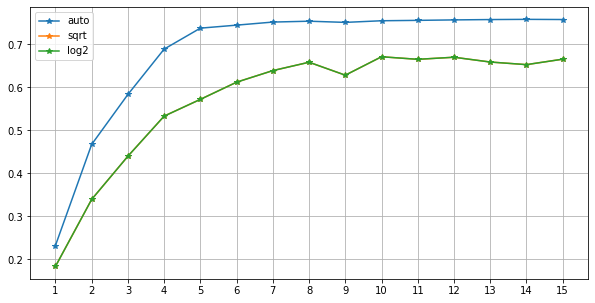

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20, random_state=0)

params = {
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

plt.figure(figsize=(10,5))
for feat in params['max_features']:
    r2_oob =  list()
    for depth in params['max_depth']:
        rf = RandomForestRegressor(max_depth=depth, max_features=feat, random_state=0, oob_score=True)
        rf.fit(X_train, y_train)
        r2_oob.append(rf.oob_score_)
    plt.plot(np.arange(1, len(params['max_depth'])+1),  r2_oob, "*-", label=feat)
plt.legend()
plt.xticks(np.arange(1, len(params['max_depth'])+1))
plt.grid()
plt.show()


b) Faça o mesmo para o **XgBoost**. Mas agora, gere uma curva para cada valor de 'max_depth' e no eixo X coloque o valor de 'gamma'. 

Escolha uma faixa de valores que indique qual o melhor desempenho do modelo e ajuste os eixos de modo a facilitar a visualização.


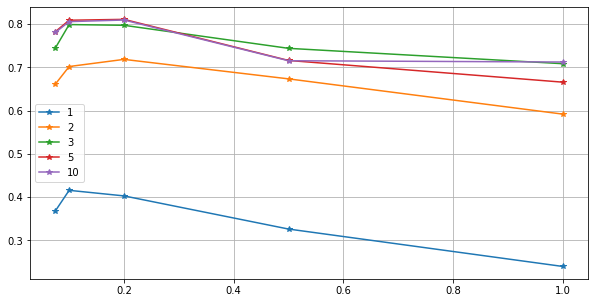

In [ ]:
# Curvas - 'max_depth'
# Eixo x - 'gamma'
# Eixo y - R²

##############################################################

import xgboost as xgb

def validacaoCruzadaXgb(X, y, param, num_round):
    kf = KFold(n_splits=5, shuffle=True, random_state=20)
    r2_cv  = []

    for train_idx, vali_idx in kf.split(X):  
        dtrain = xgb.DMatrix(X.iloc[train_idx], label=y[train_idx])    
        bst = xgb.train(param, dtrain, num_round)

        dvali  = xgb.DMatrix(X.iloc[vali_idx],  label=y[vali_idx])
        pred = bst.predict(dvali)

        r2_cv.append( r2_score(y[vali_idx], pred) )
    return np.mean(r2_cv)

params = {
    'eta': [0.075, 0.1, 0.2, 0.5, 1 ],
    'max_depth': [1,2,3,5,10]
}

plt.figure(figsize=(10,5))
for depth in params['max_depth']:
    r2_cv =  []
    for e in params['eta']:
        param = {'max_depth': depth, 'eta': e}
        r2 = validacaoCruzadaXgb(X, y, param, 100)
        r2_cv.append(r2)
    plt.plot(params['eta'],  r2_cv, "*-", label=depth)
plt.legend()
#plt.xscale('log')
plt.grid()
plt.show()

c) Faça o mesmo para o SVM para regressão. No scikit-learn, a classe que implementa o regressor é a SVR. Mas agora, gere dois gráficos:

1) com uma curva para cada tipo de kernel e no eixo X coloque o valor de 'epsilon'. Lembrando que o epsilon define a largura das margens para a regressão.

2) escolha no item 1, para cada kernel, qual o melhor valor de 'epsilon'. Agora, gere um gráfico onde cada linha representa um kernel, o eixo X diferentes valores de 'C' e o eixo y o $r^2$. 

Escolha uma faixa de valores que indique qual o melhor desempenho do modelo e ajuste os eixos de modo a facilitar a visualização.

Executing kernel: linear
linear 1
linear 10
linear 100
Executing kernel: poly
poly 1
poly 10
poly 100
Executing kernel: rbf
rbf 1
rbf 10
rbf 100


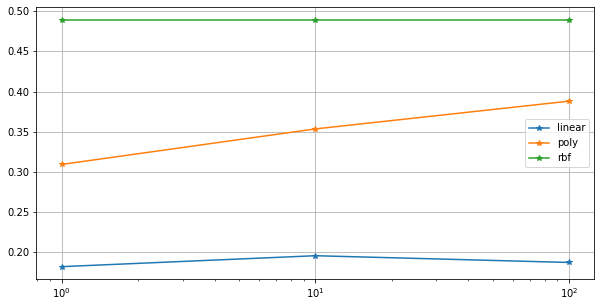

In [ ]:
# Curvas - Kernel, values = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
# Eixo x - Epsilon, default = 0.1
# Eixo y - R²

from sklearn.svm import SVR

e = 0.0005 # epsilon
params = {
    'C': [1,10,100],
    'kernel': ['linear', 'poly', 'rbf']
}

X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20, random_state=0)

plt.figure(figsize=(10,5))
for k in params['kernel']:
    print(f"Executing kernel: {k}")
    r2_cv =  list()
    for c in params['C']:
        print(k,c)
        clf = SVR(kernel=k, epsilon=e, C=c)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_vali)
        r2=r2_score(y_vali, pred)
        r2_cv.append(r2)
    plt.plot(params['C'],  r2_cv, "*-", label=k)
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()

Executing kernel: linear
linear 1
linear 10
linear 100
Executing kernel: poly
poly 1
poly 10
poly 100
Executing kernel: rbf
rbf 1
rbf 10
rbf 100


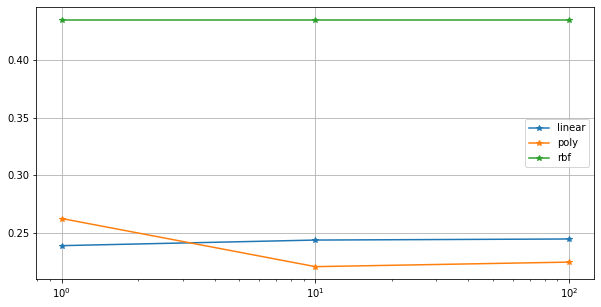

In [ ]:
# Curvas - Kernel, values = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
# Eixo x - Epsilon, default = 0.1
# Eixo y - R²

from sklearn.svm import SVR

e = 0.001 # epsilon
params = {
    'C': [1,10,100],
    'kernel': ['linear', 'poly', 'rbf']
}

X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20, random_state=0)

plt.figure(figsize=(10,5))
for k in params['kernel']:
    print(f"Executing kernel: {k}")
    r2_cv =  list()
    for c in params['C']:
        print(k,c)
        clf = SVR(kernel=k, epsilon=e, C=c)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_vali)
        r2=r2_score(y_vali, pred)
        r2_cv.append(r2)
    plt.plot(params['C'],  r2_cv, "*-", label=k)
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()

d) Discuta os resultados obtidos. 

i) Para cada um dos modelos, quais parâmetros resultaram no melhor desempenho

ii) para o SVR, qual parâmetro pareceu mais relevante, o epsilon ou 'C'?

iii) Qual modelo você escolheria para o seus dados?

***Discussão:***

Para todos os kernels RBF e Poly, um epsilon=0.0005 funcionou melhor, enquanto para o linear o melhor foi para epsilon=0.001. O SVR demora um longo tempo para executar com epsilon pequenos, de modo que é difícil testar para muitos valores de epsilon. O epsilon, que mede a largura da banda para ajuste do SVR, se mostrou um parâmetro essencial para o modelo, pois com epsilons maiores os R^2 passam a ser negativos.

Entre os kernels, o 'rbf' foi o que teve melhor desempenho e o valor do parâmetro de regularização C influenciou pouco nos resultados. Para o kernel 'poly' uma menor reagularização (valor maior de C) ajudou para o epsilon menor, mas piorou o resultado para o epsilon maior. Lembrando que um epsilon maior já resulta em uma maior regularização, pois as bandas são mais largas.

Considerando os resultados obtidos, claramente a melhor opção é o RBF com epsilon 0.0005. Para o C, os valores testados não alteraram o resultado.

## Exercício 4: (2 pontos)

Conhecimento de Domínio

Você consultou uma especialista da área de computação e ela lhe explicou que o tempo de execução é proporcional a 3 fatores:
- Tempo de execução das instruções: `instP/(clock*pipelines)`
- Tempo para acesso à memória: `instM * latency` 
- Tempo para transferência de dados da memória: `transfM / band`

Com base nesse conhecimento:

a) Crie novas preditores compostos, dados por combinações entre os preditores já existentes (ex: `A*B`, `A/B`, `A/(B*C)`, etc.). 

Em seguida, tente fazer a predição usando a regressão linear, GAM e Random Forests usando os dados `dados1000.csv`. Mostre os $r^2$ obtidos com o uso de validação cruzada.



In [ ]:
df = pd.read_csv('dados1000.csv')
y = df['y']
df = df.drop(columns=['y'])

df['executionTime'] = df['instP'] / ( df['clock'] * df['pipelines'] )
df['memAccessTime'] = df['instM'] * df['latency']
df['transferTime'] = df['transfM'] / df['band']

#normalizando os dados
X1 = StandardScaler().fit_transform(df)
X = pd.DataFrame(X1, columns=df.columns)

lr = LinearRegression()
gam = LinearGAM()
rf = RandomForestRegressor(random_state = 0)

for model in [lr, gam, rf]:
    print(f'Resultados do modelo: {model.__str__()}')
    print('R² = %.4f\n'%(validacaoCruzada(model, X, y)))

Resultados do modelo: LinearRegression()
R² = 0.9635

Resultados do modelo: LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, scale=None, terms='auto', tol=0.0001, verbose=False)
R² = 0.9581

Resultados do modelo: RandomForestRegressor(random_state=0)
R² = 0.9406



b) Por que houve uma melhora tão grande nos classificadores lineares comparado com o caso dos dados originais (exercícios 2 e 3)?

Discuta também qual o papel do conhecimento de domínio ao aplicar algoritmos de aprendizado de máquina.

***Discussão:***

Resultados dos classificadores lineares nos exercícios anteriores:

| Modelo | dados1000.csv | dados1000.csv com novas features |
| --- | --- | --- |
| LinearRegression() | 0.3056 | 0.9635 |
| LinearGAM() | 0.4496 | 0.9581 |
| RandomForestRegressor() | 0.7800 | 0.9406 |

As variáveis do banco de dados contém informações importantes sobre a arquitetura de um computador. Entretanto, não havia uma relação de linearidade entre essas variáveis e as respostas. Agora, com as novas variáveis adicionadas, os algoritmos lineares conseguem estabeler essa relação e por isso houve essa melhora nos resultados.

Ter conhecimento do problema a ser resolvido é importante, pois pode ajudar na escolha do algoritmo de aprendizado de máquina adequado. Além disso, dependendo da situação, pode até ser possível ajustar os dados para que modelos simples, como regressão linear, obtenham bons resultados.